### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [131]:
import tensorflow as tf
from tensorflow.keras import *
tf.random.set_seed(42)

In [120]:
tf.__version__

'2.0.0-beta1'

In [122]:
k.__version__

'2.2.4-tf'

### Collect Data

In [107]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [108]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [109]:
trainY[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [110]:
print(testY[0:5])

[9 2 1 1 6]


In [111]:
trainX.shape

(60000, 28, 28)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [112]:
trainY = tf.keras.utils.to_categorical(trainY)

In [113]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [114]:
testY = tf.keras.utils.to_categorical(testY)

In [115]:
print(testY.shape)
print('First 5 examples now are: ', testY[0:5])

(10000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [116]:
import matplotlib.pyplot as plt

<Figure size 720x720 with 0 Axes>

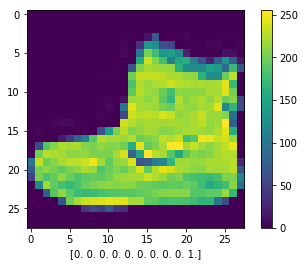

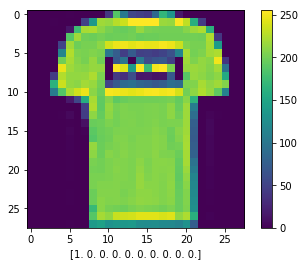

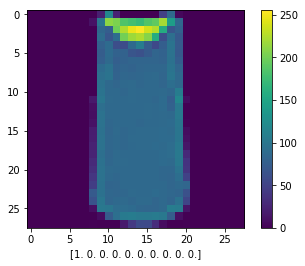

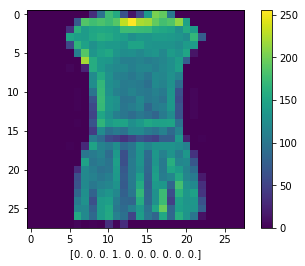

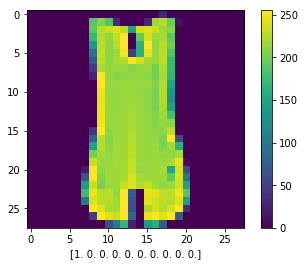

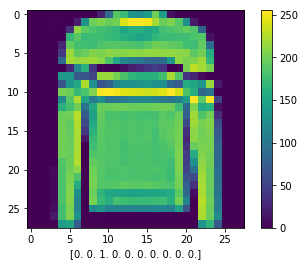

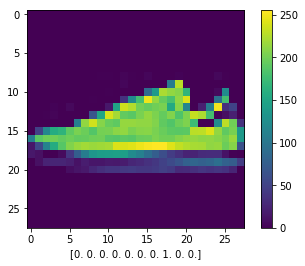

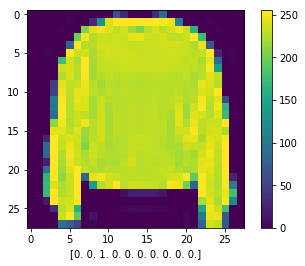

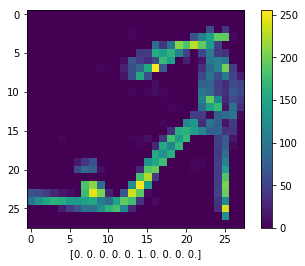

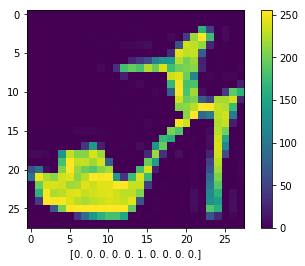

In [117]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.figure()
    plt.imshow(trainX[i])
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(trainY[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

scaling data before giving to neural network 

In [118]:
trainX = trainX / 255.0
testX = testX / 255.0

In [171]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.Dense(200, activation='sigmoid'),
tf.keras.layers.Dense(10, activation='softmax')])
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

### Execute the model using model.fit()

In [172]:
model.fit(trainX, trainY, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 1.2227 - accuracy: 0.6700
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.7406 - accuracy: 0.7561
Epoch 3/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.6423 - accuracy: 0.7782
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.5906 - accuracy: 0.7964
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5566 - accuracy: 0.8076
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5327 - accuracy: 0.8148
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5146 - accuracy: 0.8210
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5001 - accuracy: 0.8255
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.4886 - accuracy: 0.8300
Epoch 10/10
60

In [173]:
test_loss, test_acc = model.evaluate(testX, testY)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.5012 - accuracy: 0.8204
Test accuracy: 0.8204


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [174]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(200, activation='sigmoid'),
tf.keras.layers.Dense(10, activation='softmax')])
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

### Execute the model

In [175]:
model.fit(trainX, trainY, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.7976 - accuracy: 0.7487
Epoch 2/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.5513 - accuracy: 0.8098
Epoch 3/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5008 - accuracy: 0.8253
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4746 - accuracy: 0.8338
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4569 - accuracy: 0.8389
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4458 - accuracy: 0.8430
Epoch 7/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4331 - accuracy: 0.8469
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4254 - accuracy: 0.8508
Epoch 9/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4154 - accuracy: 0.8543
Epoch 10/10
60

In [176]:
test_loss, test_acc = model.evaluate(testX, testY)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.4160 - accuracy: 0.8500
Test accuracy: 0.85


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [177]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.001)

In [178]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [179]:
model.fit(trainX, trainY, epochs=10, batch_size=200)
test_loss, test_acc = model.evaluate(testX, testY)
print('Test accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3770 - accuracy: 0.8677
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3764 - accuracy: 0.8667
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3742 - accuracy: 0.8684
Epoch 4/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3737 - accuracy: 0.8681
Epoch 5/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3721 - accuracy: 0.8691
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3712 - accuracy: 0.8697
Epoch 7/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3702 - accuracy: 0.8700
Epoch 8/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3689 - accuracy: 0.8710
Epoch 9/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3680 - accuracy: 0.8712
Epoch 10/10
10

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [180]:
sgd = optimizers.SGD(lr=0.03)

In [181]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(100, activation='sigmoid'),
tf.keras.layers.Dense(100, activation='sigmoid'),
tf.keras.layers.Dense(10, activation='softmax')])
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

## Review model

### Run the model

In [182]:
model.fit(trainX, trainY, epochs=10, batch_size=200)
test_loss, test_acc = model.evaluate(testX, testY)
print('Test accuracy:', test_acc)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/sample - loss: 2.1608 - accuracy: 0.4058
Epoch 2/10
60000/60000 [==============================] - 2s 29us/sample - loss: 1.8624 - accuracy: 0.5916
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 1.6002 - accuracy: 0.6324
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 1.3873 - accuracy: 0.6614
Epoch 5/10
60000/60000 [==============================] - 2s 31us/sample - loss: 1.2245 - accuracy: 0.6873
Epoch 6/10
60000/60000 [==============================] - 2s 32us/sample - loss: 1.1002 - accuracy: 0.7108
Epoch 7/10
60000/60000 [==============================] - 2s 29us/sample - loss: 1.0050 - accuracy: 0.7256
Epoch 8/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.9314 - accuracy: 0.7333
Epoch 9/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.8718 - accuracy: 0.7427
Epoch 10/10
10